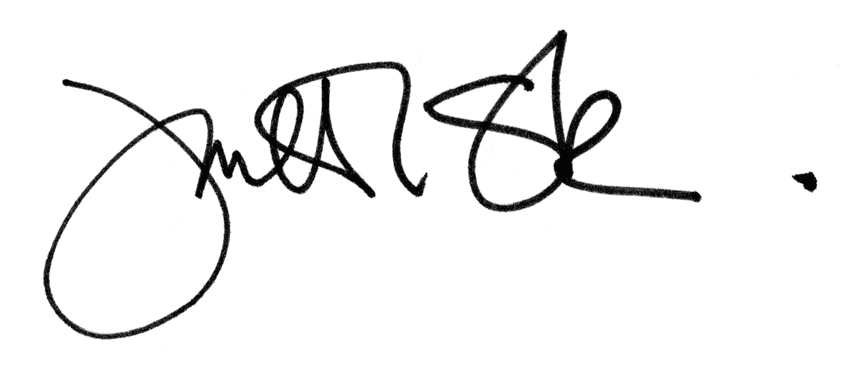

In [172]:
import numpy as np
from PIL import Image, ImageDraw

img = Image.open("./img/signature.jpg")
img = img.convert("RGBA")
img.show()

In [173]:
dx = [0,1,0,-1]
dy = [1,0,-1,0]

w,h = img.size
stack = []
for i in range(img.width):
    for j in range(img.height):
        val = img.getpixel((i,j))
        if(val[0] < 220 or val[1] < 220 or val[2] < 220): continue
        else: stack.append((i,j))

stack.append((0,0))
stack.append((w-1,h-1))
while(len(stack)):
    x,y = stack[-1]
    stack.pop()

    if(x >= w or y >= h or x < 0 or y < 0): continue
    val = img.getpixel((x,y))
    if(val[3] == 0 ): continue
    if(val[0] < 220 or val[1] < 220 or val[2] < 220): continue
    
    val = list(val) ; val[3] = 0 ; val = tuple(val)
    img.putpixel((x,y), (val))
    img.putpixel((x,y), (0,0,0,0))

    for i in range(4):
        ax = x+dx[i]
        ay = y+dy[i]
        
        if(ax >= w or ay >= h or ax < 0 or ay < 0):continue
        val = img.getpixel((ax,ay))
        if(val[3] == 0):continue
        stack.append((ax,ay))


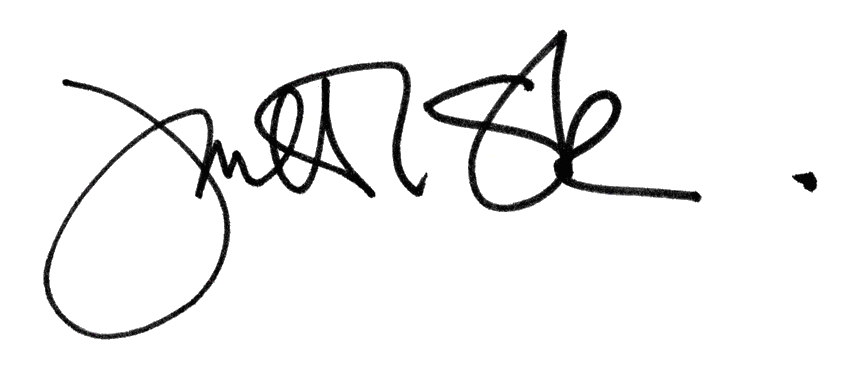

In [174]:
img.show()

## More Simple Way

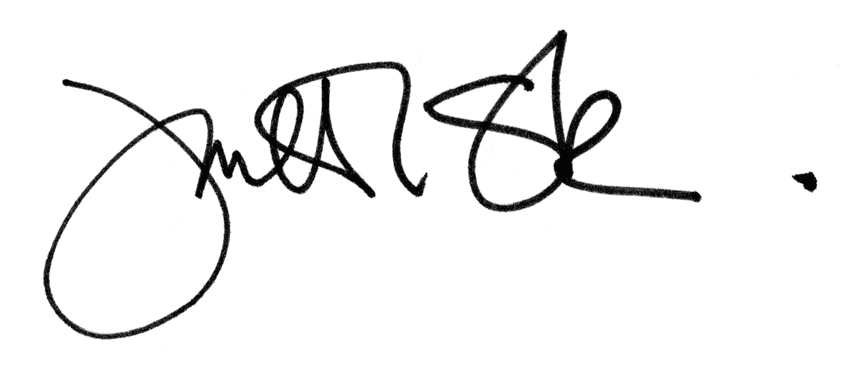

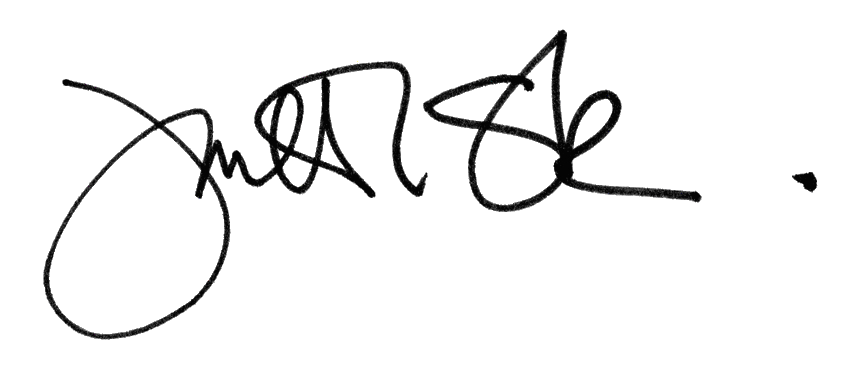

In [179]:
img = Image.open("./img/signature.jpg")
img = img.convert("RGBA")
img.show()

for i in range(img.width):
    for j in range(img.height):
        val = img.getpixel((i,j))
        if(val[0] < 220 or val[1] < 220 or val[2] < 220): continue
        else:
            ImageDraw.floodfill(img, (i,j), (255, 255, 255, 0), thresh=100)
img.show()